In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Numerical Data

In [55]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [56]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [57]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [58]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [59]:
X_train['Age'].isnull().sum()

148

In [60]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [61]:
X_test.isnull().sum()

Age            29
Fare            0
Age_imputed     0
dtype: int64

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\169372135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],hist=False,label='Original',color="green")
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\169372135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

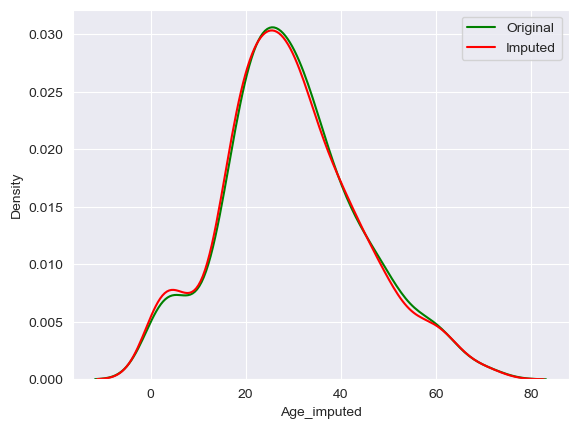

In [62]:
sns.distplot(X_train['Age'],hist=False,label='Original',color="green")
sns.distplot(X_train['Age_imputed'],hist=False,label='Imputed',color="red")

plt.legend()
plt.show()

In [63]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.7185814185985


In [64]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,65.366508
Age,71.512440,204.349513,204.349513
Age_imputed,65.366508,204.349513,206.718581


<Axes: >

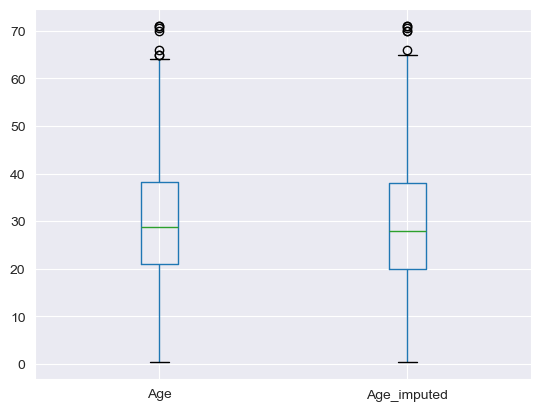

In [65]:
X_train[['Age', 'Age_imputed']].boxplot()

# Categorical Data

In [66]:
df = pd.read_csv("house-train.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [67]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:],df.iloc[:,-1],test_size=0.2,random_state=2)

In [69]:
X_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


In [70]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [71]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\1865608169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\1865608169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\1865608169.py:5

In [72]:
X_train.isnull().sum()

FireplaceQu            557
GarageQual              65
SalePrice                0
FireplaceQu_imputed      0
GarageQual_imputed       0
dtype: int64

### check Garage

In [73]:
att = pd.concat(
    [
        X_train['GarageQual'].value_counts(),
        X_train['GarageQual_imputed'].value_counts(),
    ],axis=1
)
att.columns = ['Original',"imputed"]
att

,Original,imputed
TA,1049,1112
Fa,41,42
Gd,11,11
Po,1,2
Ex,1,1


In [74]:
att = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train['GarageQual']),
    ],axis=1
)
att.columns = ['Original',"imputed"]
att

,Original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\2131018898.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[ X_train['GarageQual'] == category]['SalePrice'],hist=False,label=category)
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\2131018898.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14

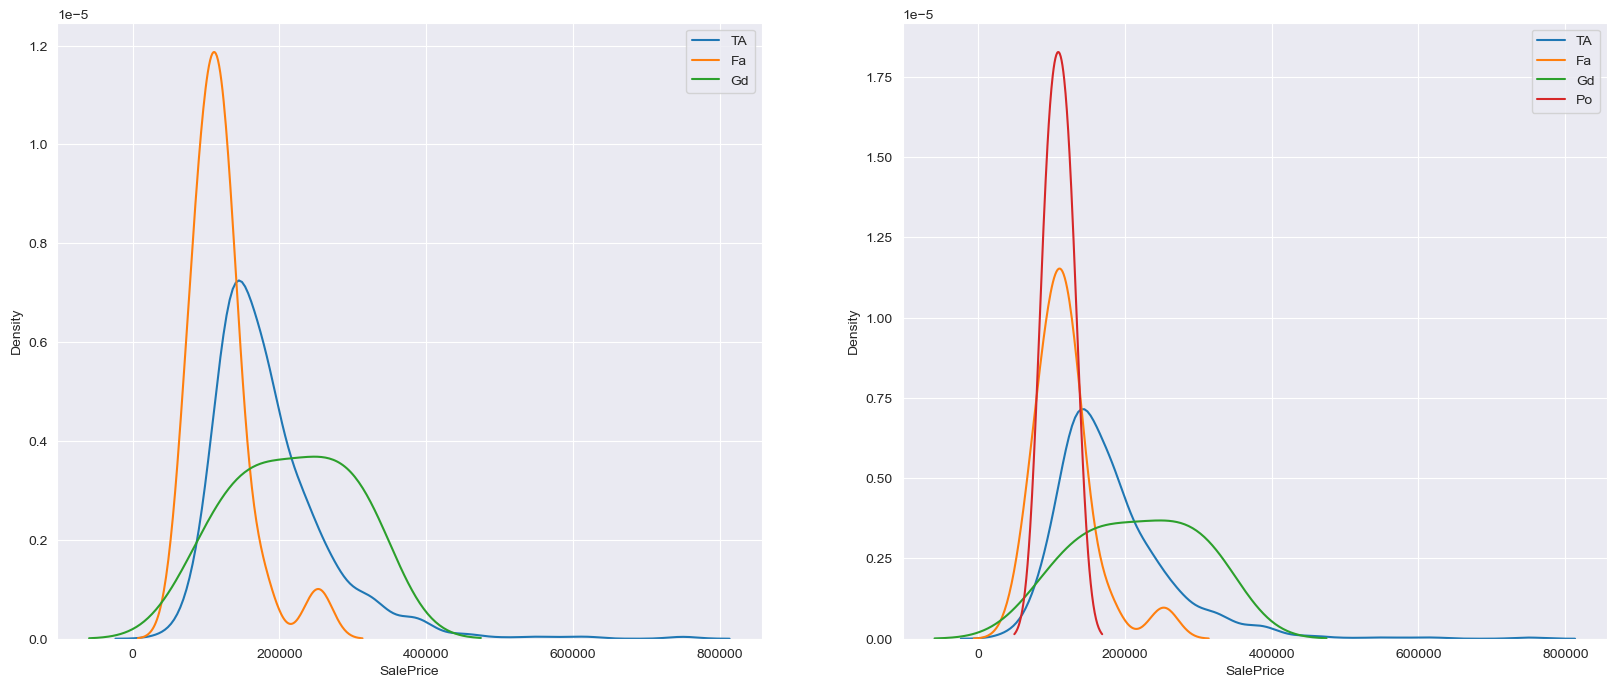

In [79]:
fig = plt.figure(figsize=(20,8))
fig.add_subplot(121)

for category in X_train['GarageQual'].dropna().unique():
    sns.distplot(X_train[ X_train['GarageQual'] == category]['SalePrice'],hist=False,label=category)
    
plt.legend()

fig.add_subplot(122)
for category in X_train['GarageQual_imputed'].dropna().unique():
    sns.distplot(X_train[ X_train['GarageQual_imputed'] == category]['SalePrice'],hist=False,label=category)

plt.legend()
plt.show()

### check Fireplace

In [80]:
att = pd.concat(
    [
        X_train['FireplaceQu'].value_counts(),
        X_train['FireplaceQu_imputed'].value_counts(),
    ],axis=1
)
att.columns = ['Original',"imputed"]
att

,Original,imputed
Gd,302,572
TA,252,487
Fa,25,47
Po,17,33
Ex,15,29


In [81]:
att = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train['GarageQual']),
    ],axis=1
)
att.columns = ['Original',"imputed"]
att

,Original,imputed
Gd,0.273799,0.489726
TA,0.228468,0.416952
Fa,0.022665,0.040240
Po,0.015413,0.028253
Ex,0.013599,0.024829


C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\2629056338.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[ X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_2404\2629056338.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.1

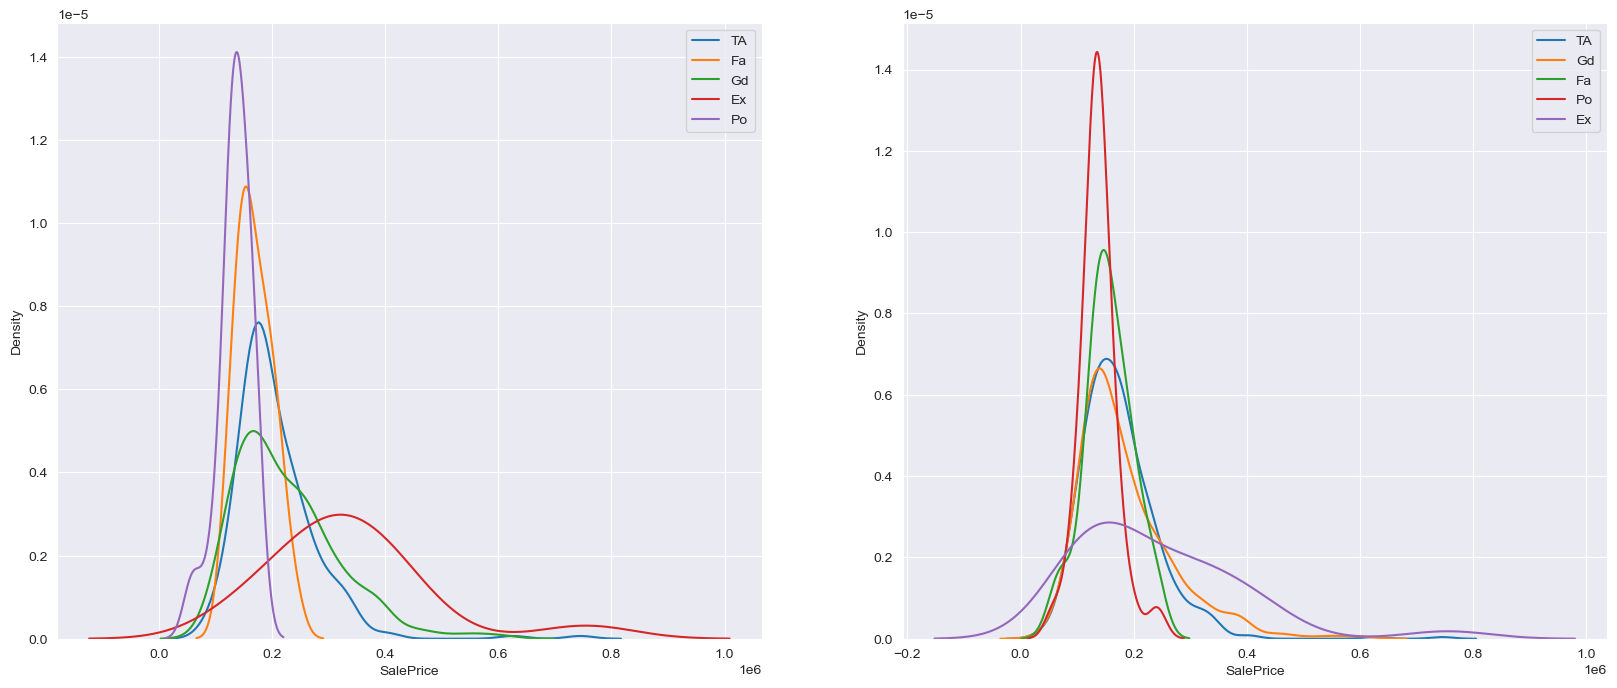

In [82]:
fig = plt.figure(figsize=(20,8))
fig.add_subplot(121)

for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[ X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
    
plt.legend()

fig.add_subplot(122)
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[ X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)

plt.legend()
plt.show()